# Preprocess and visualize option data

In [11]:
import pandas as pd

#### 1.Have 'Option2017Clean.csv':

In [12]:
Option1 = pd.read_csv('Option2017.csv')

In [13]:
Option1 = pd.DataFrame.dropna(Option1,how='any')

In [14]:
Option1.shape

(8252, 17)

In [15]:
Option1 = Option1.drop_duplicates()

In [16]:
Option1['ExpDate'] = pd.to_datetime(Option1['ExpDate'])

In [17]:
Option1.to_csv('Option2017Clean.csv')

#### 2.Have 'Option2017_2_Clean.csv':

In [18]:
Option2 = pd.read_csv('Option2017_2.csv')

In [19]:
Option2=Option2.drop(['Unnamed: 0'],axis=1)

In [20]:
Option2['ExpDate'] = pd.to_datetime(Option2['ExpDate'])

In [21]:
Option3 = pd.merge(Option1,Option2,how='left',on=['currentDate','Ticker','Last','Type','StrikePrice','ExpDate'])

In [22]:
Option3 = pd.DataFrame.dropna(Option3,how='any')

In [23]:
Option3.shape

(7216, 20)

In [24]:
Option3 = Option3.drop_duplicates()

In [25]:
Option3.head()

,ExpDate,StrikePrice,Ticker,Type,Last,Chg,Bid,Ask,Vol,Open Int,Delta,Gamma,Rho,Theta,Vega,implied volatility,currentDate,Implied volatility,Underlaying asset price,Expiration time
0,2017-03-17,22.5,ARR,Put,0.95,-0.35,0.65,1.25,1.0,9.0,-0.69794,0.28368,-0.00832,-0.00832,0.02372,0.27590,2/17/17,0.27590,21.709999,0.076660
1,2017-04-21,22.0,ARR,Call,0.30,-0.20,0.10,0.40,40.0,659.0,0.45441,0.55431,0.01692,-0.00408,0.03730,0.10719,2/17/17,0.10719,21.709999,0.172485
2,2017-04-21,20.0,ARR,Put,0.15,-0.05,0.05,0.20,3.0,251.0,-0.12236,0.11984,-0.00430,-0.00275,0.01999,0.25595,2/17/17,0.25595,21.709999,0.172485
3,2017-04-21,22.0,ARR,Put,0.83,-0.02,0.65,1.00,1.0,166.0,-0.52709,0.26444,-0.01502,-0.00457,0.03551,0.21858,2/17/17,0.21858,21.709999,0.172485
4,2017-04-21,23.0,ARR,Put,1.55,0.05,1.40,1.85,2.0,145.0,-0.68386,0.17777,-0.01760,-0.00590,0.03575,0.33344,2/17/17,0.33344,21.709999,0.172485


In [26]:
Option3 = Option3.dropna(how='any')

In [27]:
Option3.shape

(7174, 20)

In [28]:
Option3.to_csv('Option2017_2_Clean.csv')

#### 3.Visualize and generate eps/tiﬀ ﬁles:

In [29]:
Option3 = pd.read_csv('Option2017_2_Clean.csv')

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [31]:
aapl = Option3[Option3['Ticker'] == 'AAPL']
intl = Option3[Option3['Ticker'] == 'INTL']
msft = Option3[Option3['Ticker'] == 'MSFT']
amzn = Option3[Option3['Ticker'] == 'AMZN']
goog = Option3[Option3['Ticker'] == 'GOOG']

In [32]:
aapl.head()

,Unnamed: 0,ExpDate,StrikePrice,Ticker,Type,Last,Chg,Bid,Ask,Vol,...,Delta,Gamma,Rho,Theta,Vega,implied volatility,currentDate,Implied volatility,Underlaying asset price,Expiration time
2084,2399,2017-02-24,123.0,AAPL,Call,12.55,-0.06,12.50,12.95,5.0,...,1.0,0.0,0.02339,-0.01881,0.0,0.37750,2/17/17,0.37750,135.720001,0.019165
2085,2400,2017-02-24,126.0,AAPL,Call,9.45,-0.05,9.55,9.90,7.0,...,1.0,0.0,0.02396,-0.01927,0.0,0.31360,2/17/17,0.31360,135.720001,0.019165
2086,2401,2017-02-24,127.0,AAPL,Call,8.50,-0.02,8.60,8.80,30.0,...,1.0,0.0,0.02415,-0.01943,0.0,0.25110,2/17/17,0.25110,135.720001,0.019165
2087,2402,2017-02-24,128.0,AAPL,Call,7.55,0.15,7.55,7.85,59.0,...,1.0,0.0,0.02434,-0.01958,0.0,0.22892,2/17/17,0.22892,135.720001,0.019165
2088,2403,2017-02-24,130.0,AAPL,Call,5.68,0.28,5.55,5.95,379.0,...,1.0,0.0,0.02473,-0.01989,0.0,0.20144,2/17/17,0.20144,135.720001,0.019165


In [33]:
#APPLE 3D
strike_price0 = aapl['StrikePrice']
time_to_maturity0 = aapl['Expiration time']
implied_vol0 = aapl['implied volatility']

In [34]:
len(aapl)

248

In [35]:
x = strike_price0
y = time_to_maturity0
z = implied_vol0

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(size=8,color=z,
        colorscale='Viridis', 
        opacity=0.8))

data = [trace1]
layout = go.Layout(
    title='Apple 3D Visualization',
    xaxis=dict(title='Strike Price',titlefont=dict(size=18,color='#7f7f7f')),
    yaxis=dict(title='Time to Maturity',titlefont=dict(size=18,color='#7f7f7f')),
    margin=dict(l=0,r=0,b=0,t=0))

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Jessicazzh/0 or inside your plot.ly account where it is named '3d-scatter-colorscale'


In [36]:
#INTL 3D
intl

,Unnamed: 0,ExpDate,StrikePrice,Ticker,Type,Last,Chg,Bid,Ask,Vol,...,Delta,Gamma,Rho,Theta,Vega,implied volatility,currentDate,Implied volatility,Underlaying asset price,Expiration time
6422,7425,2017-04-21,35.0,INTL,Put,0.85,-0.05,0.6,1.1,98.0,...,-0.18505,0.05279,-0.01229,-0.01204,0.03765,0.26483,2/17/17,0.26483,36.91,0.172485


In [37]:
strike_price1 = intl['StrikePrice']
time_to_maturity1 = intl['Expiration time']
implied_vol1 = intl['implied volatility']

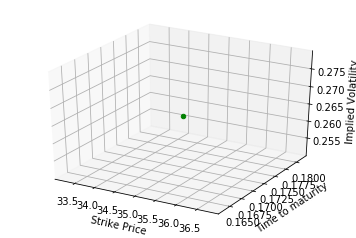

In [38]:
fig = plt.figure().gca(projection='3d')  
fig.scatter(strike_price1, time_to_maturity1, implied_vol1, c='g')

fig.set_xlabel('Strike Price')
fig.set_ylabel('Time to maturity')
fig.set_zlabel('Implied Volatility')

plt.show()

In [39]:
#MSFT 3D
msft

,Unnamed: 0,ExpDate,StrikePrice,Ticker,Type,Last,Chg,Bid,Ask,Vol,...,Delta,Gamma,Rho,Theta,Vega,implied volatility,currentDate,Implied volatility,Underlaying asset price,Expiration time


There is no MSFT data in the set, therefore no graphs here.

In [40]:
#AMZN 3D
strike_price3 = amzn['StrikePrice']
time_to_maturity3 = amzn['Expiration time']
implied_vol3 = amzn['implied volatility']

In [41]:
x = strike_price3
y = time_to_maturity3
z = implied_vol3

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(size=8,color=z,
        colorscale='Viridis', 
        opacity=0.8))

data = [trace1]
layout = go.Layout(
    title='Amazon 3D Visualization',
    xaxis=dict(title='Strike Price',titlefont=dict(size=18,color='#7f7f7f')),
    yaxis=dict(title='Time to Maturity',titlefont=dict(size=18,color='#7f7f7f')),
    margin=dict(l=0,r=0,b=0,t=0))

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Jessicazzh/0 or inside your plot.ly account where it is named '3d-scatter-colorscale'


In [42]:
#GOOG 3D
strike_price4 = goog['StrikePrice']
time_to_maturity4 = goog['Expiration time']
implied_vol4 = goog['implied volatility']

In [43]:
x = strike_price4
y = time_to_maturity4
z = implied_vol4

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(size=8,color=z,
        colorscale='Viridis', 
        opacity=0.8))

data = [trace1]
layout = go.Layout(
    title='Google 3D Visualization',
    xaxis=dict(title='Strike Price',titlefont=dict(size=18,color='#7f7f7f')),
    yaxis=dict(title='Time to Maturity',titlefont=dict(size=18,color='#7f7f7f')),
    margin=dict(l=0,r=0,b=0,t=0))

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Jessicazzh/0 or inside your plot.ly account where it is named '3d-scatter-colorscale'


In [44]:
Option3.head()

,Unnamed: 0,ExpDate,StrikePrice,Ticker,Type,Last,Chg,Bid,Ask,Vol,...,Delta,Gamma,Rho,Theta,Vega,implied volatility,currentDate,Implied volatility,Underlaying asset price,Expiration time
0,0,2017-03-17,22.5,ARR,Put,0.95,-0.35,0.65,1.25,1.0,...,-0.69794,0.28368,-0.00832,-0.00832,0.02372,0.27590,2/17/17,0.27590,21.709999,0.076660
1,1,2017-04-21,22.0,ARR,Call,0.30,-0.20,0.10,0.40,40.0,...,0.45441,0.55431,0.01692,-0.00408,0.03730,0.10719,2/17/17,0.10719,21.709999,0.172485
2,2,2017-04-21,20.0,ARR,Put,0.15,-0.05,0.05,0.20,3.0,...,-0.12236,0.11984,-0.00430,-0.00275,0.01999,0.25595,2/17/17,0.25595,21.709999,0.172485
3,3,2017-04-21,22.0,ARR,Put,0.83,-0.02,0.65,1.00,1.0,...,-0.52709,0.26444,-0.01502,-0.00457,0.03551,0.21858,2/17/17,0.21858,21.709999,0.172485
4,4,2017-04-21,23.0,ARR,Put,1.55,0.05,1.40,1.85,2.0,...,-0.68386,0.17777,-0.01760,-0.00590,0.03575,0.33344,2/17/17,0.33344,21.709999,0.172485


In [45]:
#Bid-Ask
Option3['B-A Difference'] = Option3['Ask'] - Option3['Bid']

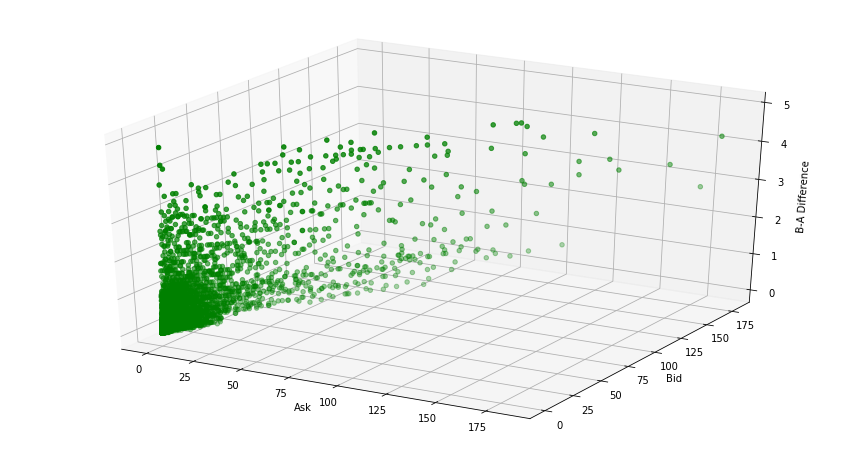

In [46]:
fig = plt.figure(figsize=(15,8)).gca(projection='3d')  
fig.scatter(Option3['Ask'],Option3['Bid'],Option3['B-A Difference'], c='g')

fig.set_xlabel('Ask')
fig.set_ylabel('Bid')
fig.set_zlabel('B-A Difference')

plt.show()

#### 4.Visualize and generate eps/tiﬀ ﬁles

In [47]:
x1 = Option3[Option3.Type == 'Call']['Implied volatility']
x2 = Option3[Option3.Type == 'Put']['Implied volatility']

hist_data = [x1, x2]
group_labels = ['Call Option', 'Put Option']
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
py.iplot(fig, filename='Distplot with Multiple Datasets')

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



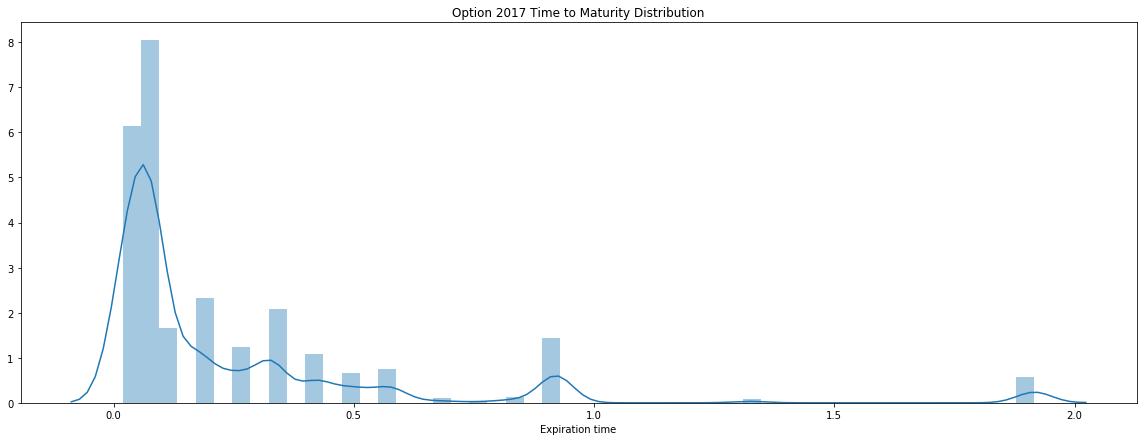

In [48]:
fig = plt.figure(figsize=(20,7))
plt.title('Option 2017 Time to Maturity Distribution')
sns.distplot(Option3['Expiration time'])

In [49]:
x = Option3['Underlaying asset price']
y = Option3['Last']

colorscale = ['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]

fig = ff.create_2d_density(
    x, y, colorscale=colorscale,
    hist_color='rgb(255, 237, 222)', point_size=3
)

py.iplot(fig, filename='histogram_subplots')